#### Import Library

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io,os,zipfile
from IPython.display import display
import calendar
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import cross_val_score

#### 1. pilih dataset & download dataset. 

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = 'C:\\Users\\DELL\\miniconda3\\Lib\\site-packages\\kaggle'
!kaggle datasets list -s "Car Crash"

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jacksondivakarr/car-crash-dataset                               Car Crash Dataset                                   4MB  2024-01-08 13:44:08           3793         63  1.0              
nathaniellybrand/chicago-car-crash-dataset                      Chicago Car Crash Dataset                         116MB  2023-07-31 19:58:33           1117         36  1.0              
joebeachcapital/car-crashes                                     Car Crashes                                        79MB  2023-08-22 05:16:00           1474         44  1.0              
asefjamilajwad/car-crash-dataset-ccd                            Car Cr

In [4]:
!kaggle datasets download jacksondivakarr/car-crash-dataset


  0%|          | 0.00/3.96M [00:00<?, ?B/s]
 25%|██▌       | 1.00M/3.96M [00:04<00:12, 243kB/s]
 51%|█████     | 2.00M/3.96M [00:08<00:08, 239kB/s]
 76%|███████▌  | 3.00M/3.96M [00:13<00:04, 241kB/s]
100%|██████████| 3.96M/3.96M [00:17<00:00, 240kB/s]
100%|██████████| 3.96M/3.96M [00:17<00:00, 240kB/s]


In [5]:
local_zip = 'car-crash-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.\data')
zip_ref.close()

#### 2.Data Preprocesing

In [7]:
df = pd.read_csv("./data/monroe county car crach 2003-2015.csv", delimiter=',', encoding='ISO-8859-1')
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [8]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

In [10]:
df.duplicated().sum()

62

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52520 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               52520 non-null  int64  
 1   Month              52520 non-null  int64  
 2   Day                52520 non-null  int64  
 3   Weekend?           52520 non-null  object 
 4   Hour               52520 non-null  float64
 5   Collision Type     52520 non-null  object 
 6   Injury Type        52520 non-null  object 
 7   Primary Factor     52520 non-null  object 
 8   Reported_Location  52520 non-null  object 
 9   Latitude           52520 non-null  float64
 10  Longitude          52520 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.8+ MB


In [13]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,52520.000000,52520.000000,52520.000000,52520.000000,52520.000000,52520.000000
mean,2009.001676,6.674714,4.199105,1348.699543,35.607873,-78.676261
std,3.765195,3.512379,1.906040,529.372076,11.253230,24.877008
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.552192
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.531009
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [14]:
df.shape

(52520, 11)

In [15]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


#### 3. Data Visualization

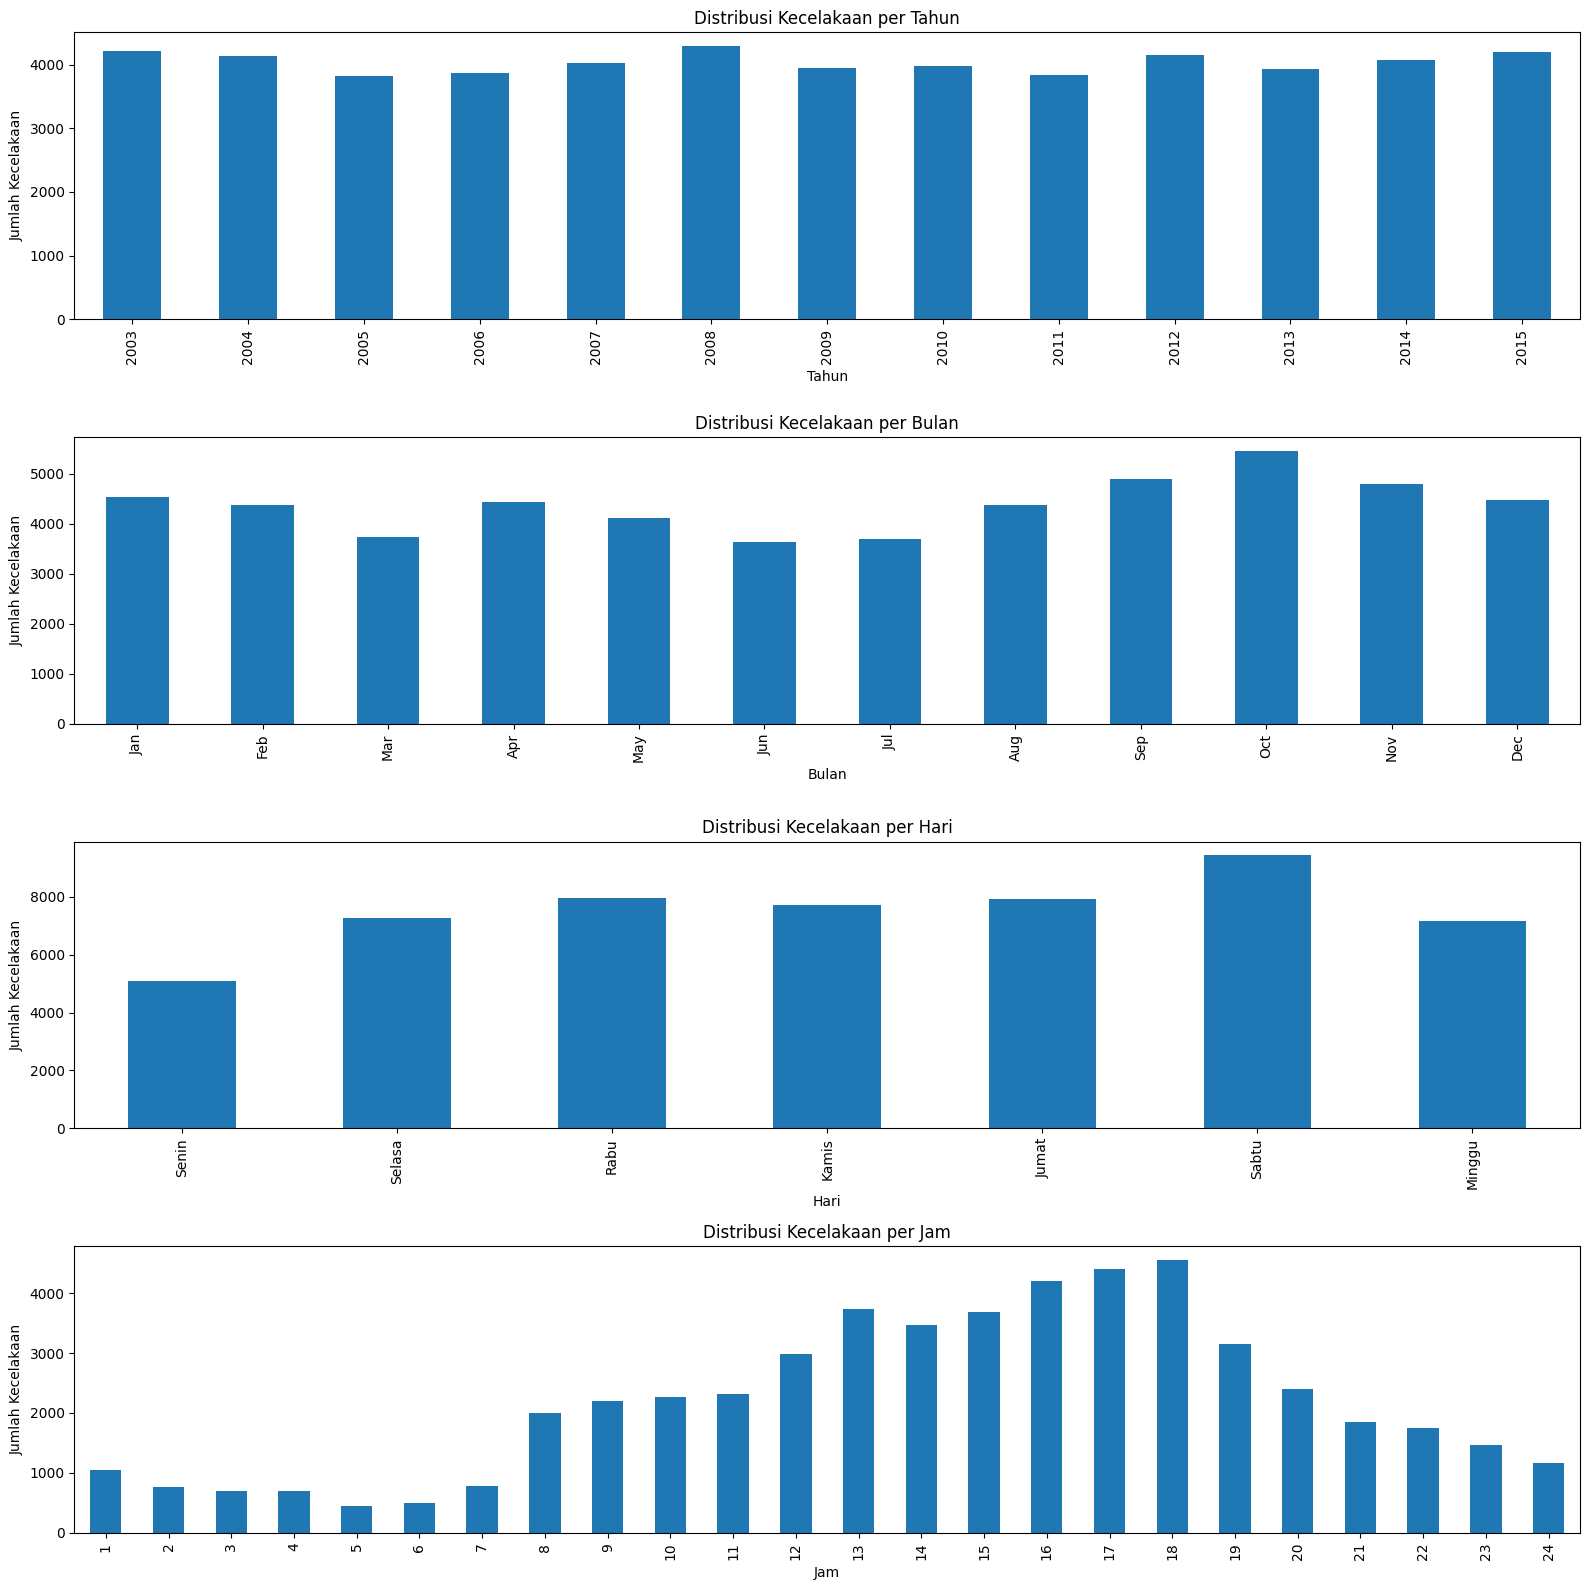

In [18]:
fig, axes = plt.subplots(nrows=4, figsize=(16, 16))

# Distribusi Kecelakaan per Tahun
df['Year'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribusi Kecelakaan per Tahun')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Kecelakaan')

# Distribusi Kecelakaan per Bulan
months = df['Month'].value_counts().sort_index().index
df['Month'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribusi Kecelakaan per Bulan')
axes[1].set_xlabel('Bulan')
axes[1].set_ylabel('Jumlah Kecelakaan')
axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Distribusi Kecelakaan per Hari
bahasa = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
days = df['Day'].value_counts().sort_index().index
df['Day'].value_counts().sort_index().plot(kind='bar', ax=axes[2])
axes[2].set_title('Distribusi Kecelakaan per Hari')
axes[2].set_xlabel('Hari')
axes[2].set_ylabel('Jumlah Kecelakaan')
axes[2].set_xticks(range(0, 7))
axes[2].set_xticklabels(bahasa)

# Distribusi Kecelakaan per Jam
hours = df['Hour'].value_counts().sort_index().index
df['Hour'].value_counts().sort_index().plot(kind='bar', ax=axes[3])
axes[3].set_title('Distribusi Kecelakaan per Jam')
axes[3].set_xlabel('Jam')
axes[3].set_ylabel('Jumlah Kecelakaan')
axes[3].set_xticks(range(24))
axes[3].set_xticklabels([str(i) for i in range(1, 25)])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

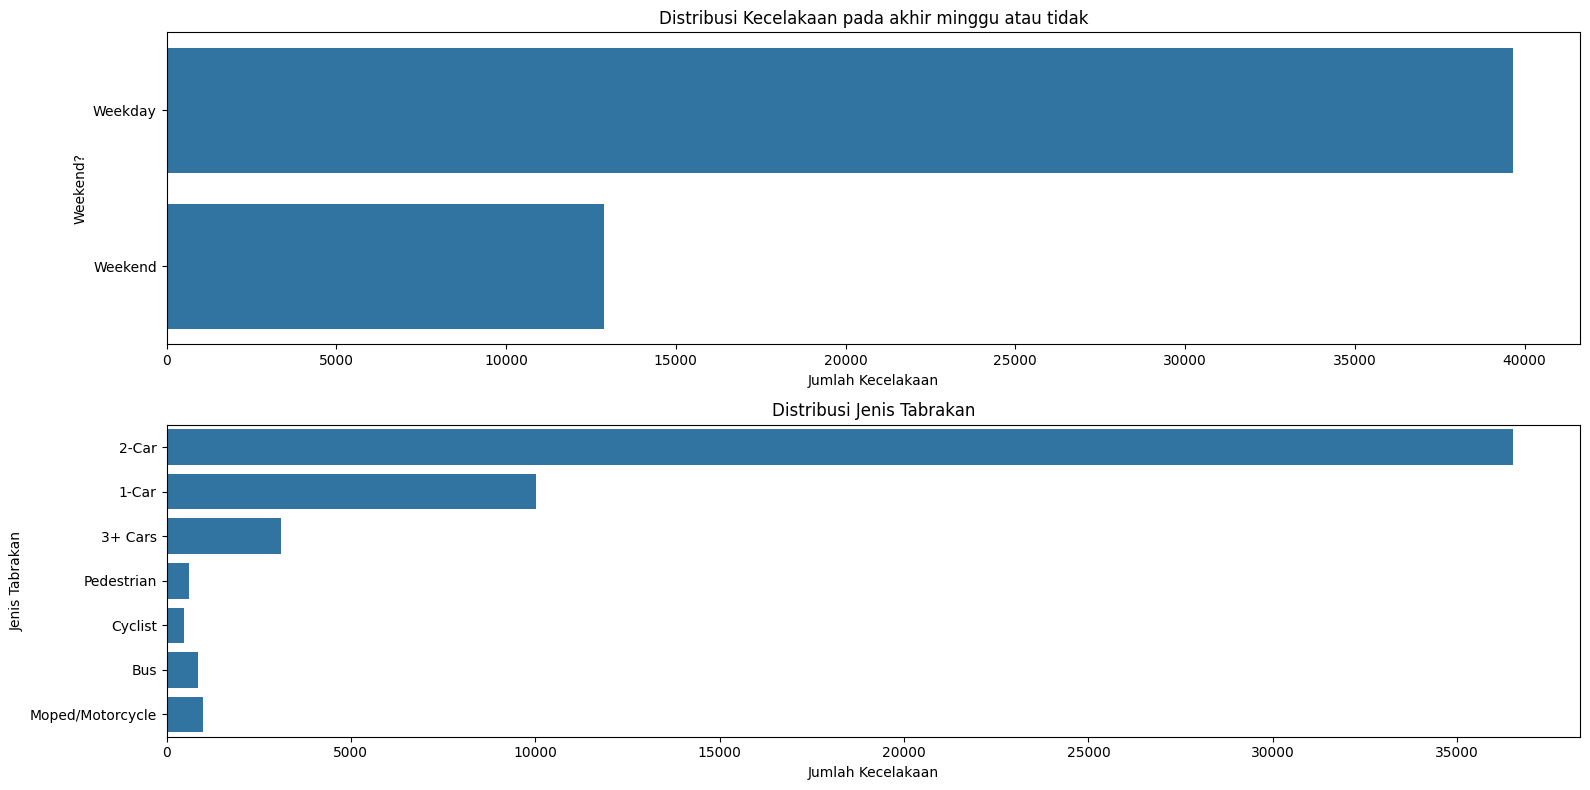

In [19]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))

# Distribusi Kecelakaan pada akhir minggu atau tidak
sns.countplot(df['Weekend?'], ax=axes[0])
axes[0].set_title('Distribusi Kecelakaan pada akhir minggu atau tidak')
axes[0].set_xlabel('Jumlah Kecelakaan')
axes[0].set_ylabel('Weekend?')

# Distribusi Jenis Tabrakan
sns.countplot(df['Collision Type'], ax=axes[1])
axes[1].set_title('Distribusi Jenis Tabrakan')
axes[1].set_xlabel('Jumlah Kecelakaan')
axes[1].set_ylabel('Jenis Tabrakan')

# Adjust layout
plt.tight_layout()

#### 4. Model

In [22]:
data_subset = df[['Hour', 'Collision Type', 'Injury Type', 'Primary Factor']]
data_subset = data_subset.sample(frac=0.6, random_state=42)

label_encoder = LabelEncoder()
data_encoded = data_subset.apply(label_encoder.fit_transform)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [24]:
# Partitioning_Cluster (KMEANS Clustering)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
data_subset['Partitioning_Cluster'] = kmeans.fit_predict(data_scaled)

# Hierarchical Clustering (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=3)
data_subset['Hierarchical_Cluster'] = agg_cluster.fit_predict(data_scaled)

# Density-based Clustering (DBSCAN)
dbscan = DBSCAN(eps=0.5, min_samples=20)
data_subset['Density_Cluster'] = dbscan.fit_predict(data_scaled)

# Model-based Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
data_subset['Model_Based_Cluster'] = gmm.fit_predict(data_scaled)

In [25]:
print(f"{data_subset['Partitioning_Cluster'].value_counts()}\n")
print(f"{data_subset['Hierarchical_Cluster'].value_counts()}\n")
print(f"{data_subset['Model_Based_Cluster'].value_counts()}")

Partitioning_Cluster
0    15151
1     9786
2     6575
Name: count, dtype: int64

Hierarchical_Cluster
0    24458
1     5752
2     1302
Name: count, dtype: int64

Model_Based_Cluster
0    17814
2     7621
1     6077
Name: count, dtype: int64


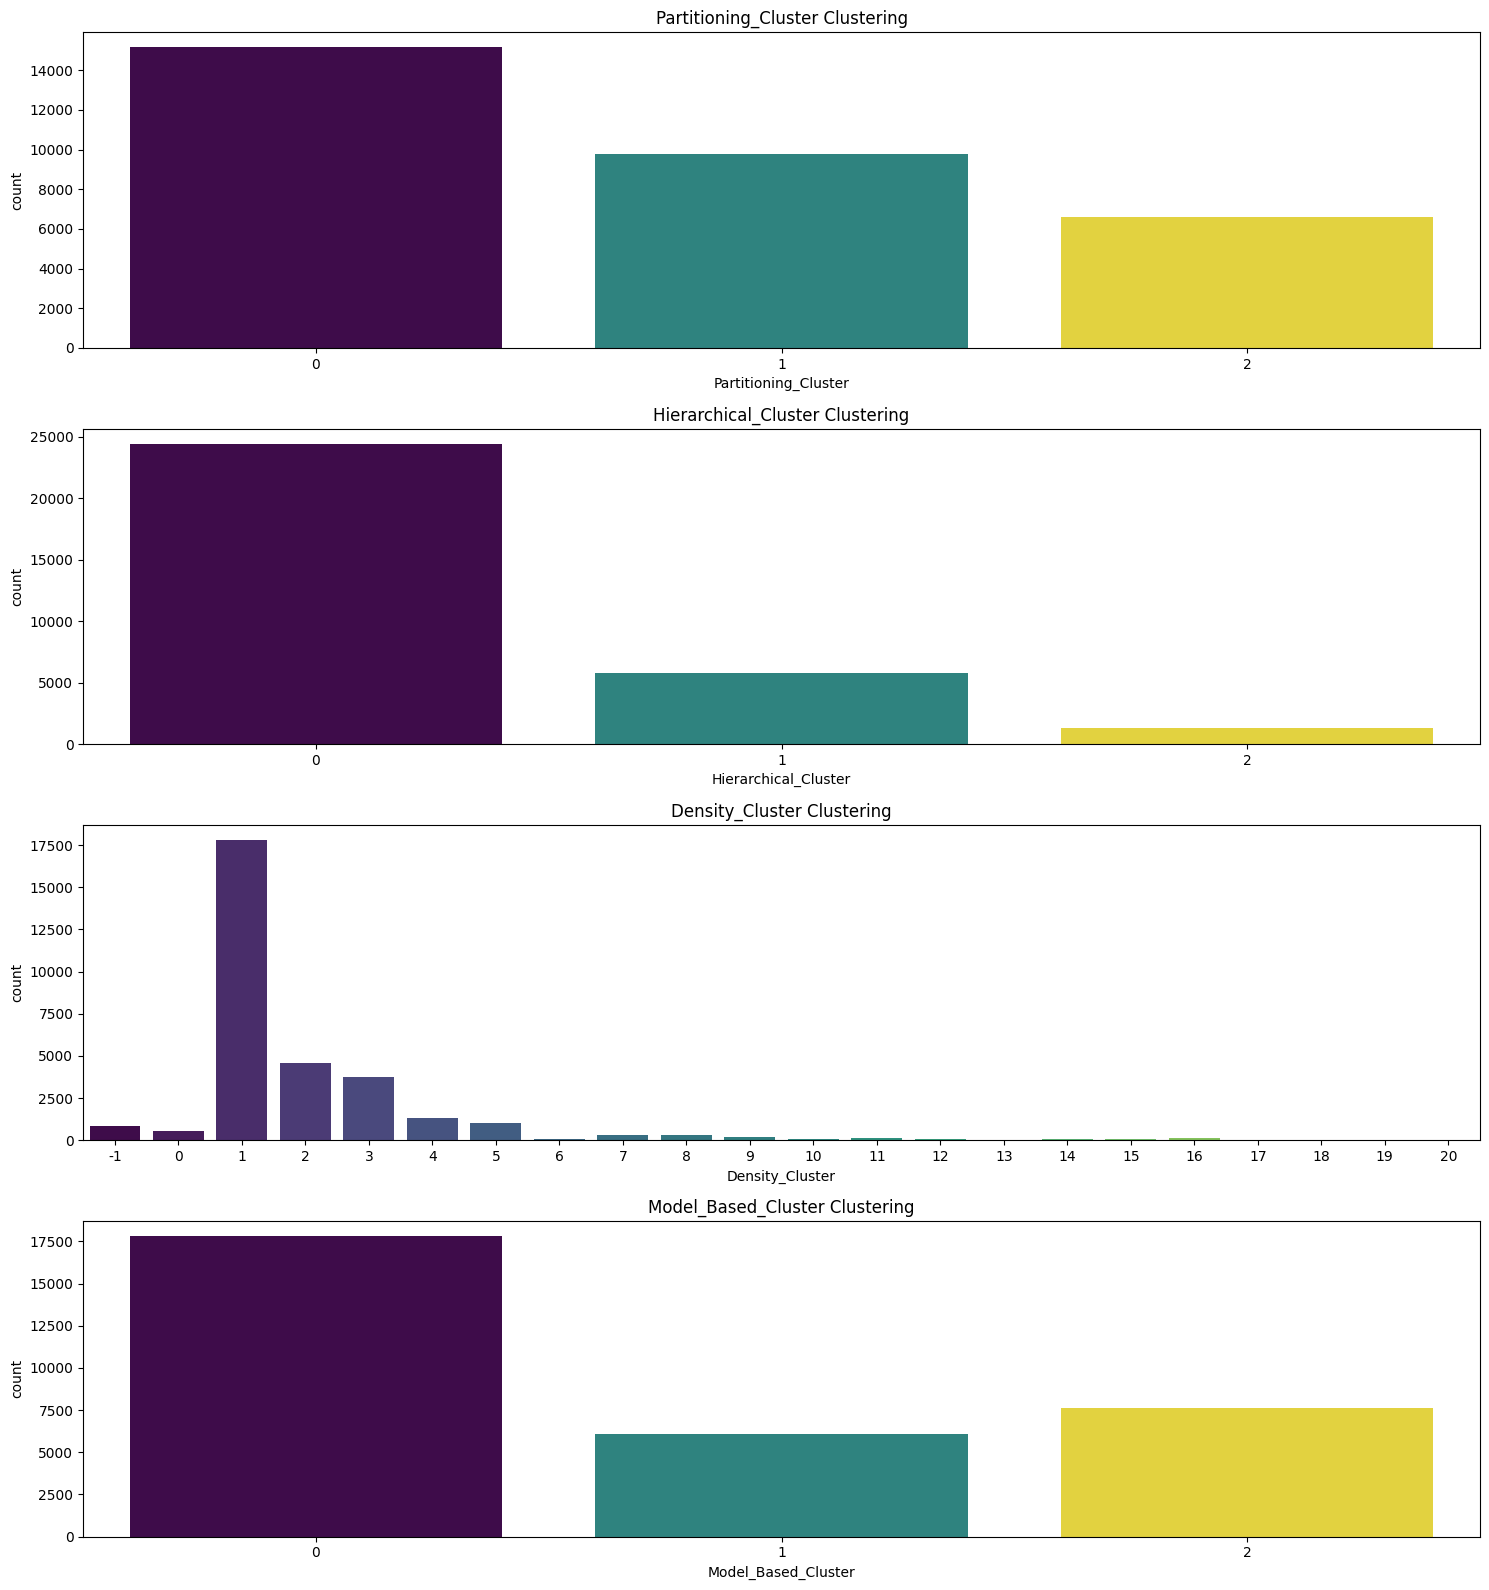

In [26]:
cluster_columns = ['Partitioning_Cluster', 'Hierarchical_Cluster', 'Density_Cluster', 'Model_Based_Cluster']

plt.figure(figsize=(15, 16))
for i, column in enumerate(cluster_columns, 1):
    plt.subplot(4, 1, i)
    sns.countplot(data=data_subset, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'{column} Clustering')

plt.tight_layout()
plt.show()